In [1]:
#Maternal Health Risk Analysis and Classification

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split as split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


In [3]:
#loading dataset
data = pd.read_csv(r'maternalRisk.csv')
data.head() #first 5 rows

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [4]:
data = data.drop(columns=['BS'])
data.tail() #last 5 rows

,Age,SystolicBP,DiastolicBP,BodyTemp,HeartRate,RiskLevel
1009,22,120,60,98.0,80,high risk
1010,55,120,90,98.0,60,high risk
1011,35,85,60,98.0,86,high risk
1012,43,120,90,98.0,70,high risk
1013,32,120,65,101.0,76,mid risk


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BodyTemp     1014 non-null   float64
 4   HeartRate    1014 non-null   int64  
 5   RiskLevel    1014 non-null   object 
dtypes: float64(1), int64(4), object(1)
memory usage: 47.7+ KB


In [6]:
'''
We can see total 6 variables, and each variables has 1014 observations.
Age: Any ages in years when a women during pregnant.
SystolicBP: Upper value of Blood Pressure in mmHg.
DiastolicBP: Lower value of Blood Pressure in mmHg,
BS: Blood glucose levels is in terms of a molar concentration, mmol/L.
BodyTemp: Women body temperature.
HeartRate: A normal resting heart rate in beats per minute.
Risk Level: Predicted Risk Intensity Level during pregnancy considering the previous attribute.
'''
#Risk level -> Target Variable

'\nWe can see total 6 variables, and each variables has 1014 observations.\nAge: Any ages in years when a women during pregnant.\nSystolicBP: Upper value of Blood Pressure in mmHg.\nDiastolicBP: Lower value of Blood Pressure in mmHg,\nBS: Blood glucose levels is in terms of a molar concentration, mmol/L.\nBodyTemp: Women body temperature.\nHeartRate: A normal resting heart rate in beats per minute.\nRisk Level: Predicted Risk Intensity Level during pregnancy considering the previous attribute.\n'

In [7]:
#Checking Null/Missing Values
data.isnull().sum()


Age            0
SystolicBP     0
DiastolicBP    0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [8]:
#Checking Duplicates
print(f"There are {data.duplicated().sum()} duplicates data")
data.loc[data.duplicated(keep=False)].sort_values(by=data.columns.to_list())

There are 707 duplicates data


,Age,SystolicBP,DiastolicBP,BodyTemp,HeartRate,RiskLevel
670,10,100,50,99.0,70,mid risk
849,10,100,50,99.0,70,mid risk
276,12,90,60,102.0,60,high risk
371,12,90,60,102.0,60,high risk
1000,12,90,60,102.0,60,high risk
...,...,...,...,...,...,...
553,60,120,85,98.0,60,mid risk
772,60,120,85,98.0,60,mid risk
818,60,120,85,98.0,60,mid risk
114,63,140,90,98.0,90,high risk


In [9]:
#UNIVARIATE ANALYSIS

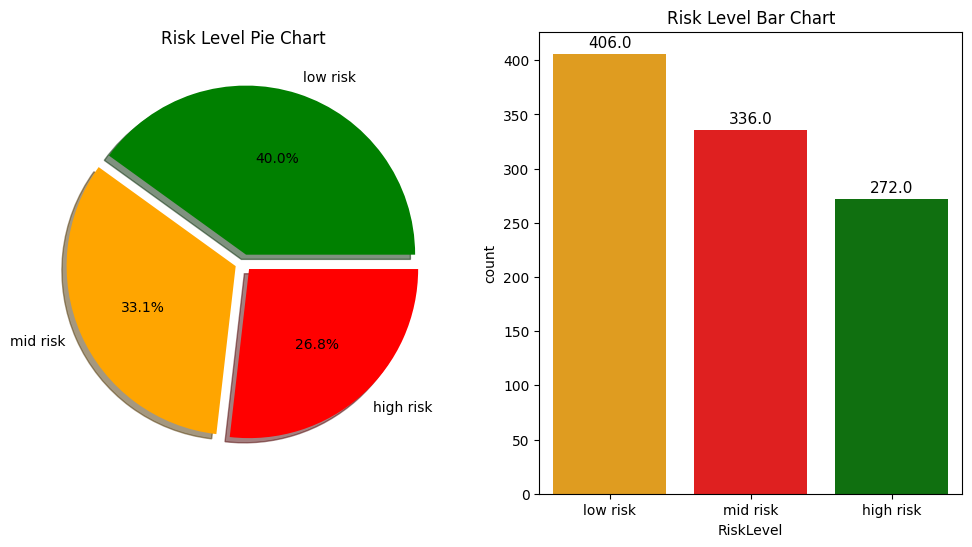

In [10]:
#RISK LEVEL
p_colors = ['green', 'orange', 'red']
risk_order = ["low risk", "mid risk", "high risk"]
fig, ax = plt.subplots(1,2, figsize=(12,6))

data["RiskLevel"].value_counts().plot(kind="pie", labels=risk_order, colors=p_colors, explode=[0.05, 0.05,  0.05], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title("Risk Level Pie Chart")
ax[0].set_ylabel('')

count = sns.countplot(x="RiskLevel", data=data, ax=ax[1], order=risk_order, hue="RiskLevel", palette=p_colors)
for bar in count.patches:
    count.annotate(format(bar.get_height()),
        (bar.get_x() + bar.get_width() / 2,
         bar.get_height()), ha='center', va='center',
        size=11, xytext=(0, 8),
        textcoords='offset points')
ax[1].set_title("Risk Level Bar Chart")
plt.show()

In [11]:
#Out of 1014 observations, 406 (40%) of pregnant women has low risk, 336 (33.1%) has med risk, and 272 (26.8%) has high risk. 

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1014.0,29.871795,13.474386,10.0,19.0,26.0,39.0,70.0
SystolicBP,1014.0,113.198225,18.403913,70.0,100.0,120.0,120.0,160.0
DiastolicBP,1014.0,76.460552,13.885796,49.0,65.0,80.0,90.0,100.0
BodyTemp,1014.0,98.665089,1.371384,98.0,98.0,98.0,98.0,103.0
HeartRate,1014.0,74.301775,8.088702,7.0,70.0,76.0,80.0,90.0


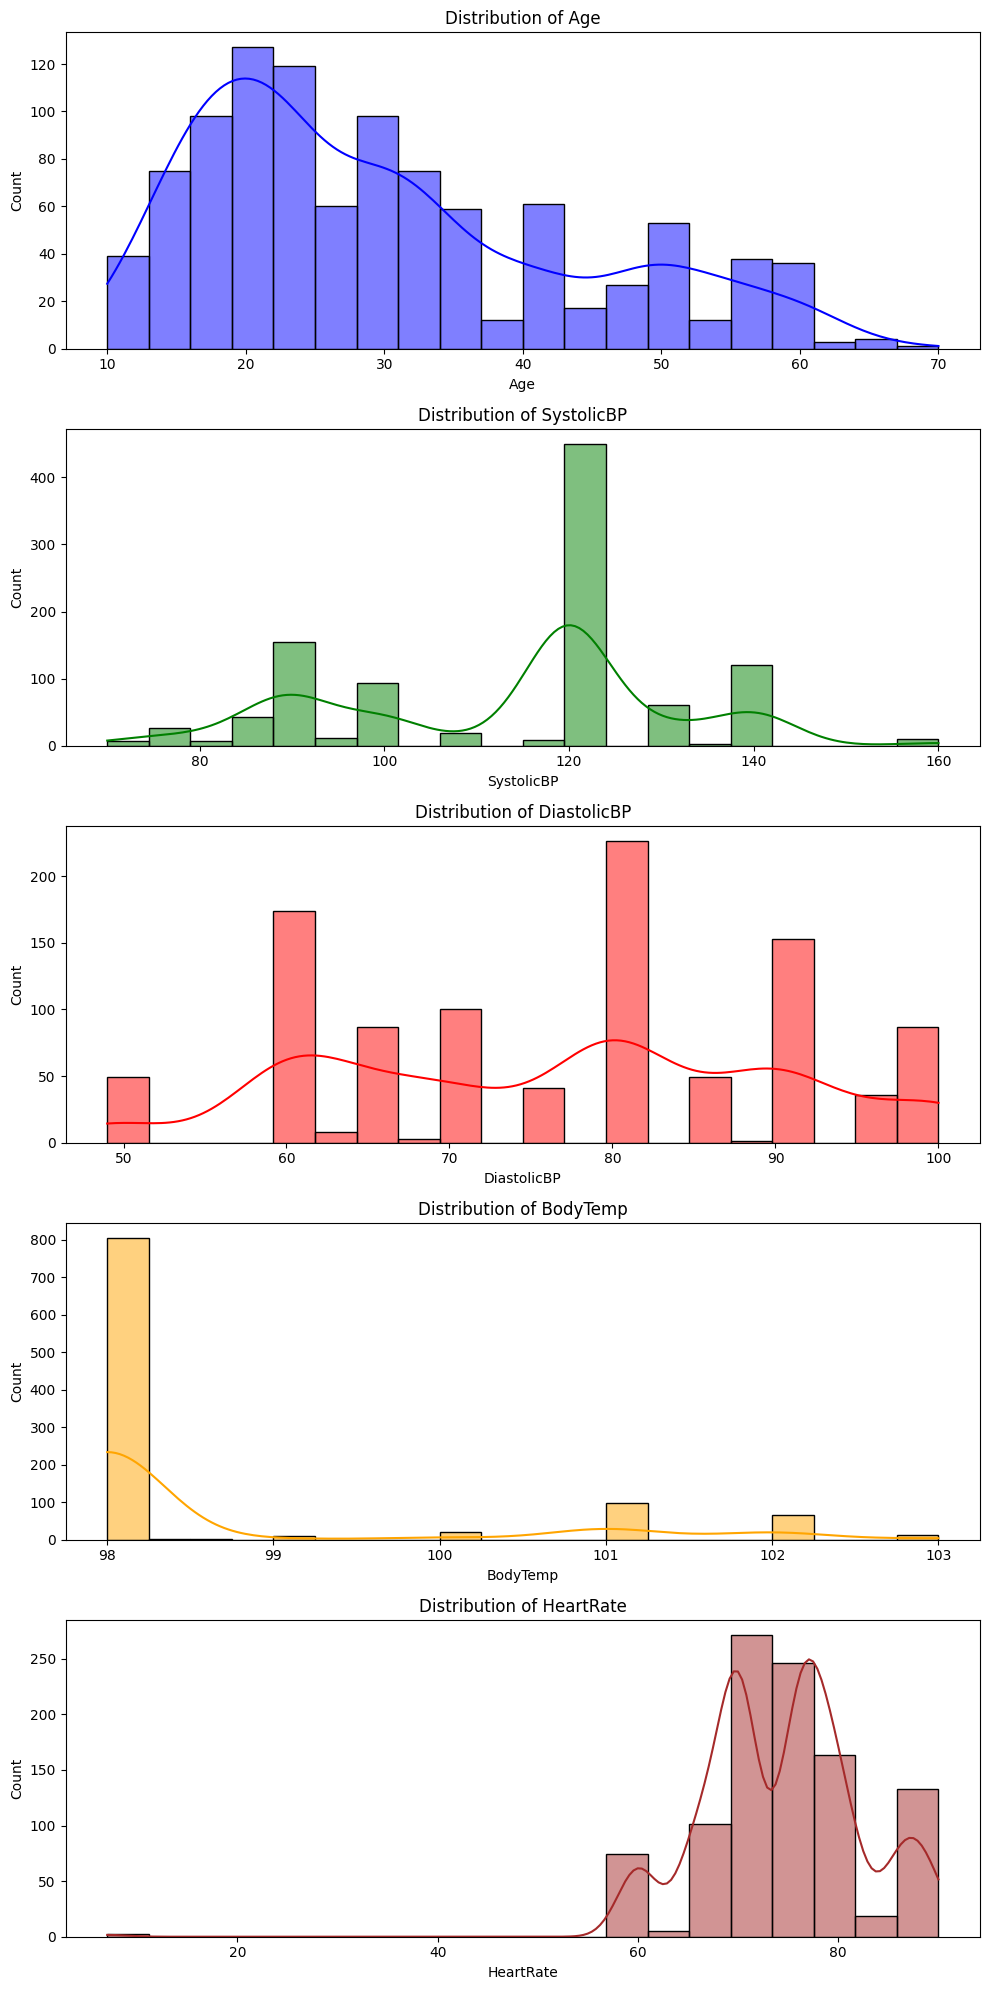

In [13]:
# Distribution of Numerical Variables
plt.figure(figsize=(10,20))
plt.subplot(5, 1, 1)
sns.histplot(data['Age'], kde=True, color='blue', bins=20)
plt.title('Distribution of Age')

plt.subplot(5, 1, 2)
sns.histplot(data['SystolicBP'], kde=True, color='green', bins=20)
plt.title('Distribution of SystolicBP')

plt.subplot(5, 1, 3)
sns.histplot(data['DiastolicBP'], kde=True, color='red', bins=20)
plt.title('Distribution of DiastolicBP')


plt.subplot(5, 1, 4)
sns.histplot(data['BodyTemp'], kde=True, color='orange', bins=20)
plt.title('Distribution of BodyTemp')

plt.subplot(5, 1, 5)
sns.histplot(data['HeartRate'], kde=True, color='brown', bins=20)
plt.title('Distribution of HeartRate')

plt.tight_layout()
plt.show()

In [14]:
#BIVARIATE ANALYSIS

In [15]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'RiskLevel' column to encode risk levels as numerical values
data['RiskLevel'] = label_encoder.fit_transform(data['RiskLevel'])

# Display the encoded DataFrame
print(data)

      Age  SystolicBP  DiastolicBP  BodyTemp  HeartRate  RiskLevel
0      25         130           80      98.0         86          0
1      35         140           90      98.0         70          0
2      29          90           70     100.0         80          0
3      30         140           85      98.0         70          0
4      35         120           60      98.0         76          1
...   ...         ...          ...       ...        ...        ...
1009   22         120           60      98.0         80          0
1010   55         120           90      98.0         60          0
1011   35          85           60      98.0         86          0
1012   43         120           90      98.0         70          0
1013   32         120           65     101.0         76          2

[1014 rows x 6 columns]


In [16]:
# 0 -> High Risk
# 1 -> Medium Risk
# 2 -> Low Risk

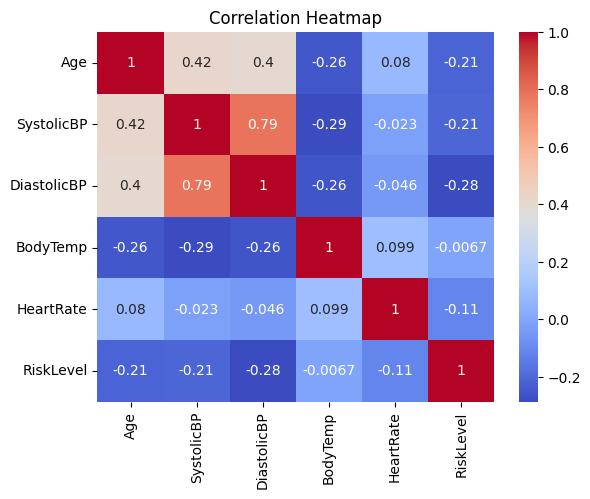

In [17]:
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

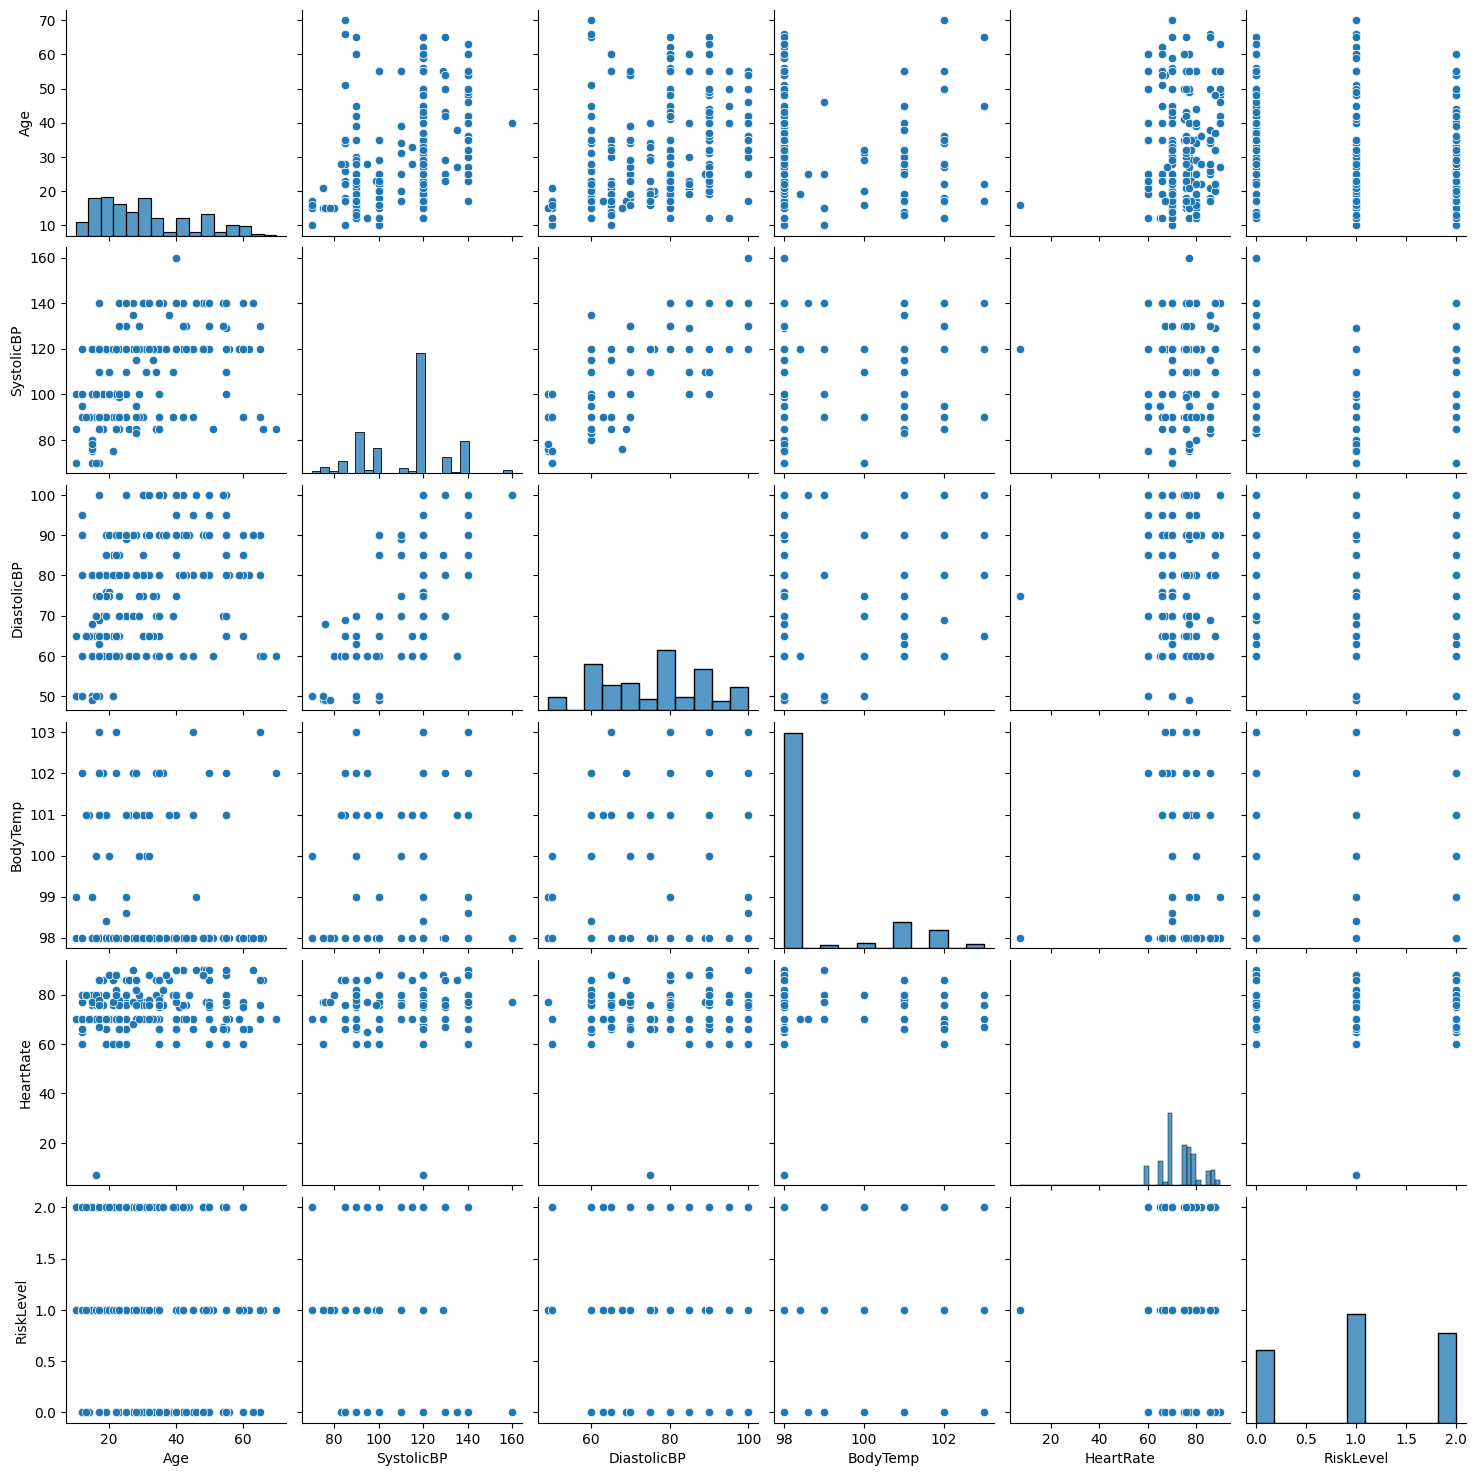

In [18]:
sns.pairplot(data)
plt.show()

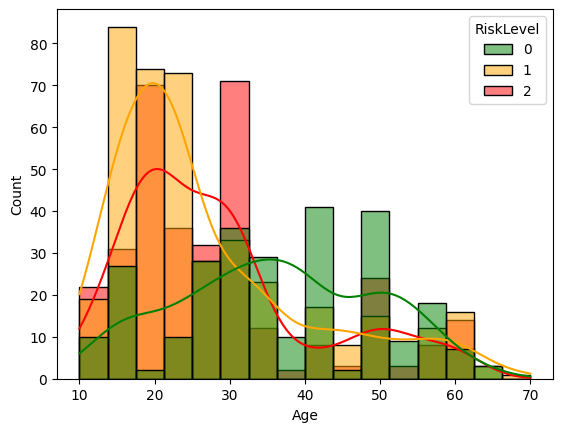

In [19]:
sns.histplot(data=data, x="Age", hue="RiskLevel", kde=True, palette=p_colors)
plt.show()

In [20]:
pd.crosstab(data.RiskLevel, data.Age).style.background_gradient(cmap='summer_r')

Age,10,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,48,49,50,51,54,55,56,59,60,62,63,65,66,70
RiskLevel,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,7,3,3,0,0,24,0,2,0,0,5,5,0,21,0,2,5,8,10,0,18,2,3,22,2,6,2,2,34,0,4,3,0,1,1,16,2,22,0,9,17,1,0,7,0,2,1,0,0
1,2,15,2,0,56,10,18,8,28,11,27,28,42,3,16,0,5,7,2,6,7,18,0,2,21,0,0,0,0,1,1,15,0,0,8,0,4,5,5,1,0,12,0,2,13,1,0,2,1,1
2,2,13,7,0,4,6,21,11,37,11,11,12,24,0,11,3,2,16,30,14,15,12,3,0,7,2,0,0,2,2,0,4,2,3,0,0,6,2,16,0,3,8,0,0,14,0,0,0,0,0


In [21]:
# Pregnant women aged below 24 years mostly dont have high health risk.
# Health risks will start to increase after 34 years.
# the health risk of pregnant women over 59 years old is decreased

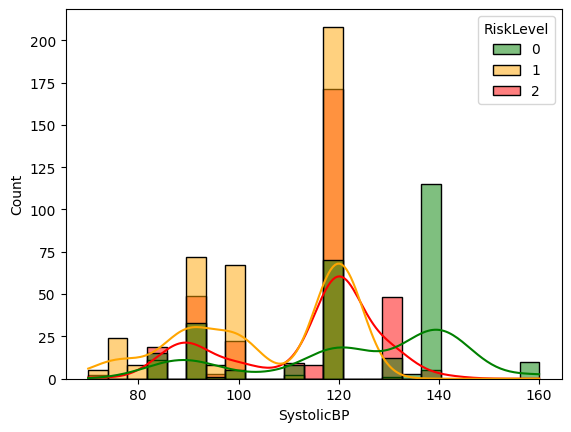

In [22]:
sns.histplot(data=data, x="SystolicBP", hue="RiskLevel", kde=True, palette=p_colors)
plt.show()

In [23]:
pd.crosstab(data.RiskLevel, data.SystolicBP).style.background_gradient(cmap='summer_r')

SystolicBP,70,75,76,78,80,83,85,90,95,99,100,110,115,120,129,130,135,140,160
RiskLevel,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,2,13,33,1,0,5,8,0,70,0,12,3,115,10
1,5,8,16,3,5,0,11,72,8,2,65,2,0,208,1,0,0,0,0
2,2,0,0,0,0,0,19,49,3,0,22,9,8,171,0,48,0,5,0


In [24]:
# The higher pregnant women's blood pressure, the higher the health risk

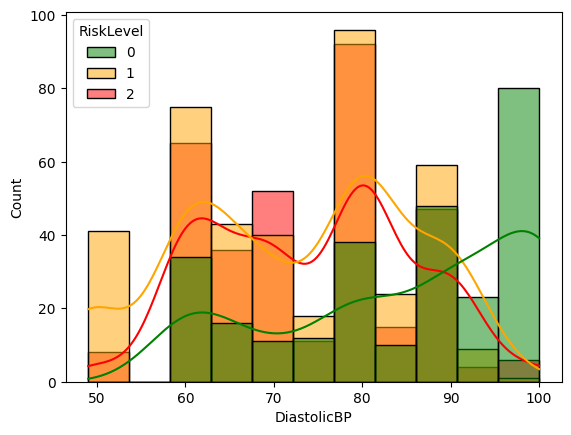

In [25]:
sns.histplot(data=data, x="DiastolicBP", hue="RiskLevel", kde=True, palette=p_colors)
plt.show()

In [26]:
pd.crosstab(data.RiskLevel, data.DiastolicBP).style.background_gradient(cmap='summer_r')

DiastolicBP,49,50,60,63,65,68,69,70,75,76,80,85,89,90,95,100
RiskLevel,,,,,,,,,,,,,,,,
0,0,0,34,2,14,0,1,10,12,0,38,10,0,48,23,80
1,25,16,75,2,41,2,0,38,15,3,96,24,1,58,9,1
2,0,8,65,4,32,0,0,52,11,0,92,15,0,47,4,6


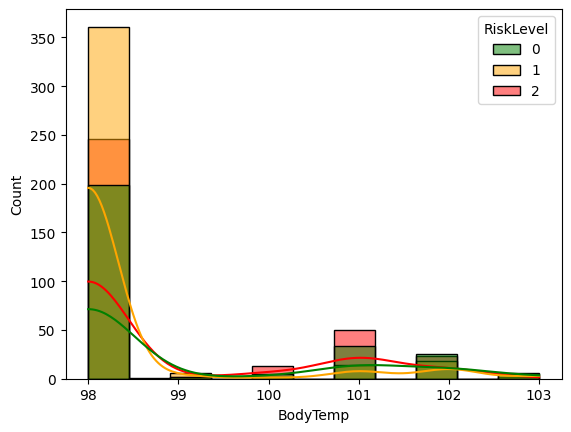

In [27]:
sns.histplot(data=data, x="BodyTemp", hue="RiskLevel", kde=True, palette=p_colors)
plt.show()

In [28]:
pd.crosstab(data.RiskLevel, data.BodyTemp).style.background_gradient(cmap='summer_r')

BodyTemp,98.000000,98.400000,98.600000,99.000000,100.000000,101.000000,102.000000,103.000000
RiskLevel,,,,,,,,
0,199,0,1,2,5,34,25,6
1,359,2,0,6,2,14,18,5
2,246,0,0,2,13,50,23,2


In [29]:
# Pregnant women with body temperature >= 100 mostly has higher health risk

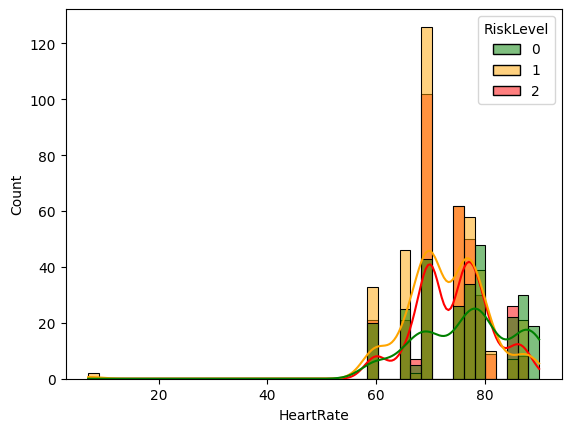

In [30]:
sns.histplot(data=data, x="HeartRate", hue="RiskLevel", kde=True, palette=p_colors)
plt.show()

In [31]:
pd.crosstab(data.RiskLevel, data.HeartRate).style.background_gradient(cmap='summer_r')

HeartRate,7,60,65,66,67,68,70,75,76,77,78,80,82,86,88,90
RiskLevel,,,,,,,,,,,,,,,,
0,0,20,0,25,5,0,43,6,20,25,9,48,0,22,30,19
1,2,33,2,44,2,0,126,7,55,56,2,39,10,7,21,0
2,0,21,3,18,5,2,102,6,56,15,35,30,9,26,8,0


In [32]:
#Health risks seem to be getting higher along with the number of heart rate.

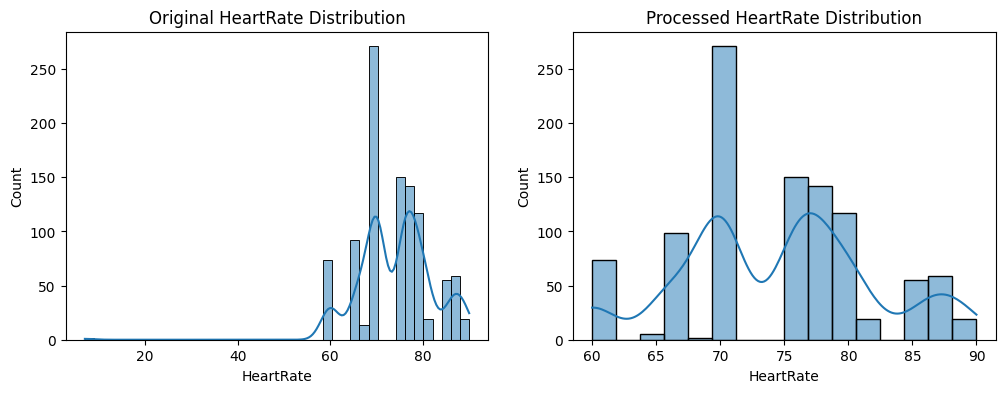

In [33]:
data_proc = data.drop(data.index[data.HeartRate == 7])

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(data=data, x="HeartRate", kde=True, ax=ax[0])
sns.histplot(data=data_proc, x="HeartRate", kde=True, ax=ax[1])
ax[0].set_title("Original HeartRate Distribution")
ax[1].set_title("Processed HeartRate Distribution")
plt.show()

In [34]:
# Original Dataset
X = data.drop("RiskLevel", axis=1)
y = data.RiskLevel
x_train, x_test, y_train, y_test = split(X, y, test_size=0.2, random_state=1)

# Processed Dataset
X_proc = data_proc.drop("RiskLevel", axis=1)
y_proc = data_proc.RiskLevel
x_train_proc, x_test_proc, y_train_proc, y_test_proc = split(X_proc, y_proc, test_size=0.2, random_state=1)

print(f"Original data has {x_train.shape[0]} train data and {x_test.shape[0]} test data\n")
print(f"Processes data has {x_train_proc.shape[0]} train data and {x_test_proc.shape[0]} test data")

Original data has 811 train data and 203 test data

Processes data has 809 train data and 203 test data


In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train_proc)
x_test = sc.transform(x_test_proc)

In [36]:
from sklearn.metrics import classification_report 
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression(random_state=1) # get instance of model
model1.fit(x_train, y_train_proc) # Train/Fit model 

y_pred1 = model1.predict(x_test) # get y predictions
print(classification_report(y_test_proc, y_pred1)) # output accuracy

              precision    recall  f1-score   support

           0       0.78      0.59      0.67        64
           1       0.67      0.84      0.75        79
           2       0.46      0.43      0.45        60

    accuracy                           0.64       203
   macro avg       0.64      0.62      0.62       203
weighted avg       0.64      0.64      0.63       203



In [37]:
from sklearn.neighbors import KNeighborsClassifier

model2 = KNeighborsClassifier() # get instance of model
model2.fit(x_train, y_train_proc) # Train/Fit model 

y_pred2 = model2.predict(x_test) # get y predictions
print(classification_report(y_test_proc, y_pred2)) # output accuracy

              precision    recall  f1-score   support

           0       0.79      0.78      0.79        64
           1       0.67      0.75      0.71        79
           2       0.58      0.50      0.54        60

    accuracy                           0.68       203
   macro avg       0.68      0.68      0.68       203
weighted avg       0.68      0.68      0.68       203



In [38]:
from sklearn.svm import SVC

model3 = SVC(random_state=1) # get instance of model
model3.fit(x_train, y_train_proc) # Train/Fit model 

y_pred3 = model3.predict(x_test) # get y predictions
print(classification_report(y_test_proc, y_pred3)) # output accuracy

              precision    recall  f1-score   support

           0       0.84      0.75      0.79        64
           1       0.68      0.90      0.78        79
           2       0.57      0.40      0.47        60

    accuracy                           0.70       203
   macro avg       0.70      0.68      0.68       203
weighted avg       0.70      0.70      0.69       203



In [39]:
from sklearn.naive_bayes import GaussianNB

model4 = GaussianNB() # get instance of model
model4.fit(x_train, y_train_proc) # Train/Fit model 

y_pred4 = model4.predict(x_test) # get y predictions
print(classification_report(y_test_proc, y_pred4)) # output accuracy

              precision    recall  f1-score   support

           0       0.80      0.70      0.75        64
           1       0.67      0.85      0.75        79
           2       0.53      0.42      0.47        60

    accuracy                           0.67       203
   macro avg       0.67      0.66      0.66       203
weighted avg       0.67      0.67      0.67       203



In [40]:
from sklearn.tree import DecisionTreeClassifier

model5 = DecisionTreeClassifier(random_state=1) # get instance of model
model5.fit(x_train, y_train_proc) # Train/Fit model 

y_pred5 = model5.predict(x_test) # get y predictions
print(classification_report(y_test_proc, y_pred5)) # output accuracy

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        64
           1       0.74      0.80      0.77        79
           2       0.74      0.65      0.69        60

    accuracy                           0.79       203
   macro avg       0.79      0.78      0.79       203
weighted avg       0.79      0.79      0.79       203



In [41]:
from sklearn.ensemble import RandomForestClassifier

model6 = RandomForestClassifier(random_state=1)# get instance of model
model6.fit(x_train, y_train_proc) # Train/Fit model 

y_pred6 = model6.predict(x_test) # get y predictions
print(classification_report(y_test_proc, y_pred6)) # output accuracy

              precision    recall  f1-score   support

           0       0.90      0.86      0.88        64
           1       0.73      0.78      0.76        79
           2       0.72      0.68      0.70        60

    accuracy                           0.78       203
   macro avg       0.78      0.78      0.78       203
weighted avg       0.78      0.78      0.78       203



In [42]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test_proc, y_pred5)
print(cm)
accuracy_score(y_test_proc, y_pred5)

[[58  3  3]
 [ 5 63 11]
 [ 2 19 39]]


0.7881773399014779

In [43]:
#Feature Importance
importance = model5.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i+1,v))

Feature: 1, Score: 0.26190
Feature: 2, Score: 0.38440
Feature: 3, Score: 0.13970
Feature: 4, Score: 0.09167
Feature: 5, Score: 0.12233


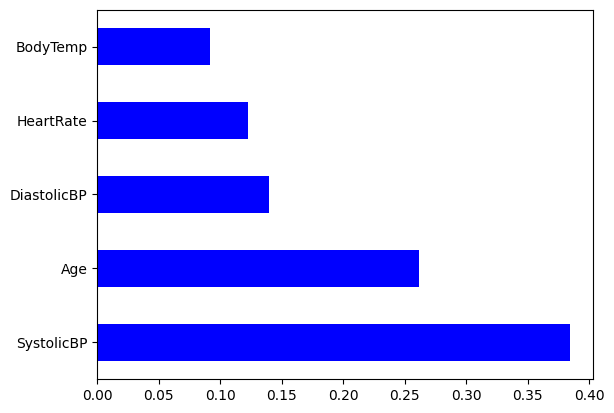

In [44]:
index= data.columns[:-1]
importance = pd.Series(model5.feature_importances_, index=index)
importance.nlargest(5).plot(kind='barh', colormap='winter')
plt.show()

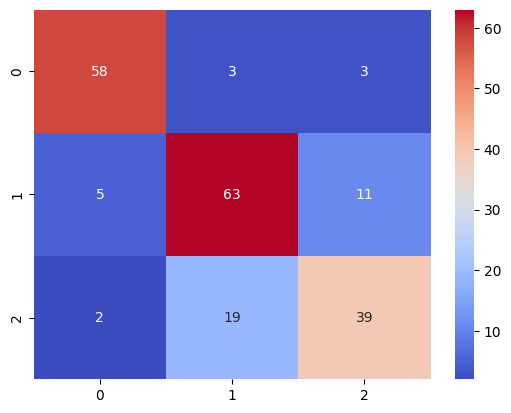

In [45]:
labels = np.unique(y_pred5)
sns.heatmap(confusion_matrix(y_test_proc, y_pred5), annot=True, xticklabels=labels, yticklabels=labels, cmap="coolwarm")
plt.show()

['dtc.joblib']

In [49]:
y_pred = model5.predict(x_test)

# Print the predictions
print("Predictions:", y_pred)

Predictions: [1 2 1 0 2 0 2 2 1 1 1 2 0 2 0 0 0 2 1 2 0 2 1 1 0 0 0 0 2 2 1 2 2 1 0 1 2
 2 0 2 1 2 1 2 2 2 1 1 1 2 0 1 1 0 1 2 1 0 1 1 1 1 1 2 0 0 1 1 1 0 1 2 1 0
 1 2 1 0 2 0 0 2 1 1 1 0 1 1 0 0 1 0 1 1 2 0 1 2 1 2 1 2 0 1 0 2 1 1 2 2 0
 1 0 1 1 0 2 1 0 2 1 1 0 1 0 2 2 1 2 1 1 1 1 0 2 0 1 0 1 0 2 0 2 1 0 0 1 2
 1 0 1 0 1 2 1 1 0 0 1 1 1 0 2 0 0 1 0 1 1 1 2 1 2 2 0 1 1 0 0 0 2 0 2 1 1
 0 0 1 1 1 2 0 2 0 0 0 1 0 1 1 0 0 2]


In [50]:
x_test

array([[ 0.88446482,  0.38322385,  0.26436991, -0.48963968, -0.60423057],
       [-0.07085165,  0.93223765, -0.46334447, -0.48963968,  0.46016253],
       [-0.51176695,  0.38322385,  0.26436991, -0.48963968, -0.60423057],
       ...,
       [ 0.73749306,  1.48125145,  1.71979867,  1.68285669, -1.13642711],
       [-0.36479519,  1.48125145,  1.71979867, -0.48963968,  0.7262608 ],
       [-0.36479519,  0.38322385,  0.99208429,  1.68285669,  0.7262608 ]])